**Keras Cifar10 Convolutional Neural Networks**

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


**Load Cifar10 Data and Show Random Samples in Cifar10**

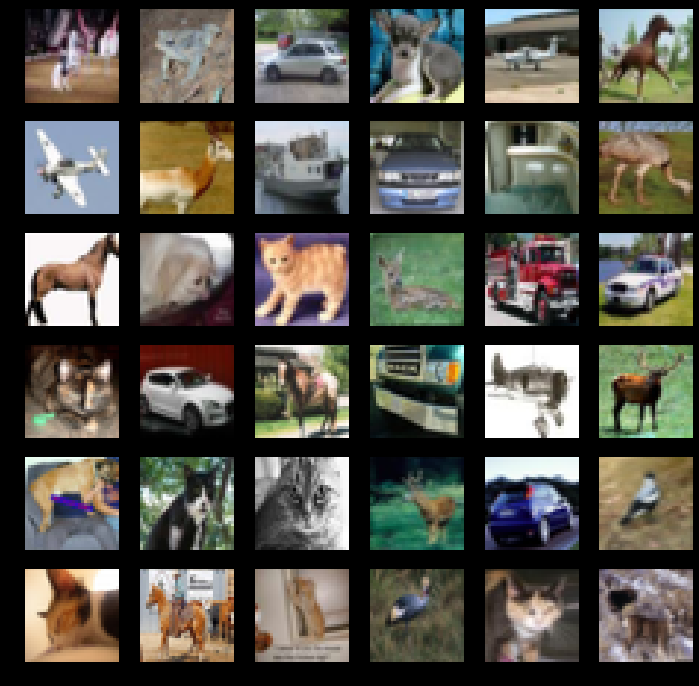

In [2]:

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

idx = np.random.randint(0, X_train.shape[0], 36)
plt.figure(figsize = (12, 12), facecolor = 'k')
for i in range(idx.size):
	plt.subplot(6, 6, i+1)
	plt.imshow(X_train[idx[i], :, :, :])
	plt.axis('off')
plt.show()

**Type Cast to float32 , Normalize to 0-1 and One-Hot Labels**

In [0]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
Y_train, Y_test = to_categorical(Y_train, 10), to_categorical(Y_test, 10)


**Make Keras Model**

In [4]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5, 5),
                 padding = 'same',
                 activation = 'relu',
                 input_shape = [32, 32, 3]))
model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2),
                    padding = 'same'))
model.add(Dropout(.25))
model.add(Conv2D(filters = 64, kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2),
                    padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(.5))
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

**Compile Model and Start Train with** *model.fit*

In [5]:
model.compile(optimizer = SGD(lr = .1),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size = 128,
          epochs = 10, verbose = 1,
          validation_split = .2) 

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 274s 7ms/step - loss: 2.2448 - acc: 0.1622 - val_loss: 2.1688 - val_acc: 0.2481
Epoch 2/10
40000/40000 [==============================] - 271s 7ms/step - loss: 2.0546 - acc: 0.2555 - val_loss: 1.9132 - val_acc: 0.2997
Epoch 3/10
40000/40000 [==============================] - 271s 7ms/step - loss: 1.8508 - acc: 0.3241 - val_loss: 1.6537 - val_acc: 0.3958
Epoch 4/10
40000/40000 [==============================] - 271s 7ms/step - loss: 1.6450 - acc: 0.4041 - val_loss: 1.5079 - val_acc: 0.4469
Epoch 5/10
40000/40000 [==============================] - 270s 7ms/step - loss: 1.5041 - acc: 0.4577 - val_loss: 1.5059 - val_acc: 0.4654
Epoch 6/10
40000/40000 [==============================] - 269s 7ms/step - loss: 1.4029 - acc: 0.4986 - val_loss: 1.3204 - val_acc: 0.5262
Epoch 7/10
40000/40000 [==============================] - 268s 7ms/step - loss: 1.3131 - acc: 0.5297 - val_loss: 1.2090 - 

**Print Test Accuracy **

In [6]:
_,acc = model.evaluate(X_test, Y_test)
print("Model Accuracy is : %.4f" % (acc*100)) 

10000/10000 [==============================] - 22s 2ms/step
Model Accuracy is : 62.6100


**Plot Accuracy and Loss per Train Epoch**

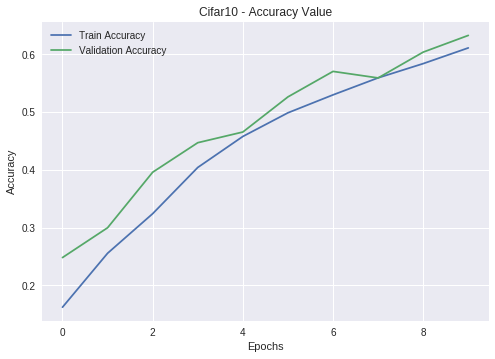

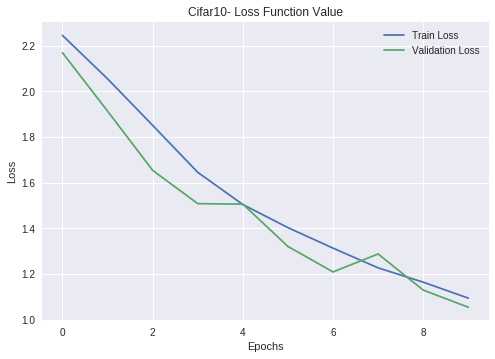

In [7]:
plt.plot(hist.history['acc'], label = 'Train Accuracy')
plt.plot(hist.history['val_acc'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Cifar10 - Accuracy Value')
plt.legend()
plt.show()

plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cifar10- Loss Function Value')
plt.legend()
plt.show()